In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_random_forest_reg(X_columns, y_columns, data)
    set_predictions(mod

### <span style='color:green'> **[done]** </span>Loading data

In [2]:
df = pd.read_csv('../data/fight_result_data_trained.csv')
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,validation,2017-07-29,Aleksandra Albu,Kailin Curran,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win,win
6730,train,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win,win


### <span style='color:green'> **[done]** </span>Define X & y:

In [3]:
req_data = ['set','date','fighter','opponent']
y = ['method']
X = ['result','kd_dif','str_dif','td_dif','sub_dif',
    'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    #'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif'
    ]

df = df[req_data + X + y]
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,method
6728,validation,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,U-DEC:
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,S-DEC:
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,KO/TKO:Punch


#### <span style='color:green'> **[done]** </span>Feature relevant methods only:

In [4]:
for i in tqdm(range(0,len(df))):
    
    method = str(df.loc[i,'method'])
    
    if method.find('KO/TKO') != -1:
        df.loc[i,'method'] = 'knockout'
    elif method.find('DEC') != -1:
        df.loc[i,'method'] = 'decision'
    elif method.find('SUB') != -1:
        df.loc[i,'method'] = 'submission'
    elif method.find('DQ') != -1:
        df.loc[i,'method'] = 'disqual'

df = df[df.method != 'disqual'].reset_index(drop=True)         
df.method.unique()        

100%|██████████| 6731/6731 [00:01<00:00, 4871.33it/s]


array(['knockout', 'decision', 'submission'], dtype=object)

#### <span style='color:green'> **[done]** </span>Transform Categorical feature "result" to fit random forest:

In [5]:
for i in tqdm(range(len(df))):
    fighter = df.loc[i,'fighter']
    result = df.loc[i,'result']
    df.loc[i,'result'] = len(df[(df.result==result)&(df.fighter==fighter)])/len(df[df.fighter==fighter])

df.tail(3)    

100%|██████████| 6711/6711 [00:10<00:00, 620.78it/s]


,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,method
6708,validation,2017-07-29,Aleksandra Albu,Kailin Curran,0.5,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,decision
6709,train,2017-07-29,Jarred Brooks,Eric Shelton,0.5,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,decision
6710,train,2017-07-29,Drew Dober,Joshua Burkman,0.166667,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,knockout


### <span style='color:green'> **[done]** </span> Random forest classifier model training:

In [6]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=300)
df = set_method_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,method,method_pred
6708,validation,2017-07-29,Aleksandra Albu,Kailin Curran,0.5,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,decision,decision
6709,train,2017-07-29,Jarred Brooks,Eric Shelton,0.5,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,decision,decision
6710,train,2017-07-29,Drew Dober,Joshua Burkman,0.166667,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,knockout,knockout


Accuracy = 0.721481


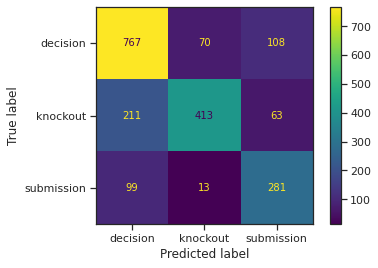

In [7]:
get_model_evaluation(data=df,y_column='method')

#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [8]:
sum_table = pd.DataFrame(columns=['n_estimators','accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256,512]):
    sum_table = pd.concat([sum_table,get_method_grad_desc_step( X_columns=X, y_columns=y, data=df, n_estimators=n)],ignore_index=True)

sum_table.tail(5)

100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


,n_estimators,accuracy
4,32,0.723969
5,64,0.719078
6,128,0.715584
7,256,0.722572
8,512,0.723270


,n_estimators,accuracy
0,32,0.723969


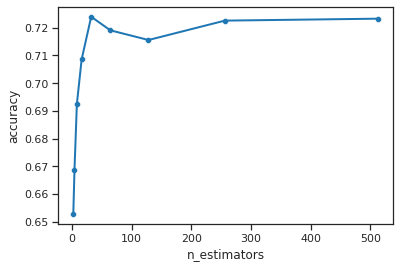

In [9]:
sns.scatterplot(data=sum_table, x='n_estimators', y='accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='accuracy')

t = sum_table[sum_table.accuracy == np.max(sum_table['accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'accuracy']
t

#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [10]:
gp = pd.read_csv('../global_variables/ml_models_parameters.csv')
gp = gp[gp.ml_model != 'method_random_forest_classifier'].reset_index(drop=True)

param = pd.DataFrame(data={'ml_model':['method_random_forest_classifier'],
                          'parameter_name':['n_estimator'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )
gp = pd.concat([gp,param],ignore_index=True)
gp.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')
gp

../global_variables/ml_models_parameters.csv saved.


,ml_model,parameter_name,value,accuracy
0,stats_random_forest_regressor,n_estimator,128,0.884200
1,result_random_forest_classifier,n_estimator,128,0.857242
2,method_random_forest_classifier,n_estimator,32,0.723969


#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [11]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=opt_n_estimators)
df = set_method_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,method,method_pred
6708,validation,2017-07-29,Aleksandra Albu,Kailin Curran,0.5,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,decision,decision
6709,train,2017-07-29,Jarred Brooks,Eric Shelton,0.5,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,decision,decision
6710,train,2017-07-29,Drew Dober,Joshua Burkman,0.166667,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,knockout,knockout


#### <span style='color:green'> **[done]** </span> Tuned model score:

Accuracy = 0.717531


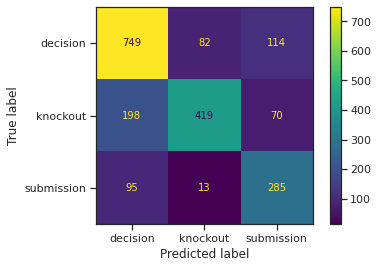

In [12]:
get_model_evaluation(data=df,y_column='method')